In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Dropout Analysis Dataset 2.csv')

### Data Inspection

In [3]:
data.head()

,Name,Age,Gender,Caste,School,Standard,Area,Dropout,Attendance_Percent
0,Aarav Sharma,12,Male,General,Primary,5,Delhi,No,73
1,Sia Patel,14,Female,OBC,Upper Primary,8,Maharashtra,Yes,92
2,Kiran Singh,11,Male,ST,Secondary,7,Uttar Pradesh,No,78
3,Meera Gupta,13,Female,SC,Higher Secondary,10,Tamil Nadu,Yes,95
4,Rahul Kumar,15,Male,General,Secondary,9,Kerala,No,89


In [4]:
data.shape

(217, 9)

In [5]:
data.describe()

,Age,Standard,Attendance_Percent
count,217.000000,217.000000,217.000000
mean,12.847926,7.069124,77.502304
std,1.981373,2.119097,9.822086
min,8.000000,3.000000,34.000000
25%,11.000000,5.000000,72.000000
50%,13.000000,7.000000,78.000000
75%,14.000000,8.000000,85.000000
max,16.000000,11.000000,96.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                217 non-null    object
 1   Age                 217 non-null    int64 
 2   Gender              217 non-null    object
 3   Caste               217 non-null    object
 4   School              217 non-null    object
 5   Standard            217 non-null    int64 
 6   Area                217 non-null    object
 7   Dropout             217 non-null    object
 8   Attendance_Percent  217 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 15.4+ KB


### Data Preprocessing

In [7]:
#checking for Null Values
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Caste                 0
School                0
Standard              0
Area                  0
Dropout               0
Attendance_Percent    0
dtype: int64

In [8]:
#Removing non required columns
data = data.drop(['Name'], axis=1)

In [9]:
data.head()

,Age,Gender,Caste,School,Standard,Area,Dropout,Attendance_Percent
0,12,Male,General,Primary,5,Delhi,No,73
1,14,Female,OBC,Upper Primary,8,Maharashtra,Yes,92
2,11,Male,ST,Secondary,7,Uttar Pradesh,No,78
3,13,Female,SC,Higher Secondary,10,Tamil Nadu,Yes,95
4,15,Male,General,Secondary,9,Kerala,No,89



### Exploratory Data Analytics

#### Univariate Analysis: Droupout (Target Variable)

In [10]:
data.Dropout.describe()

count     217
unique      2
top        No
freq      161
Name: Dropout, dtype: object

C:\Users\roxcy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


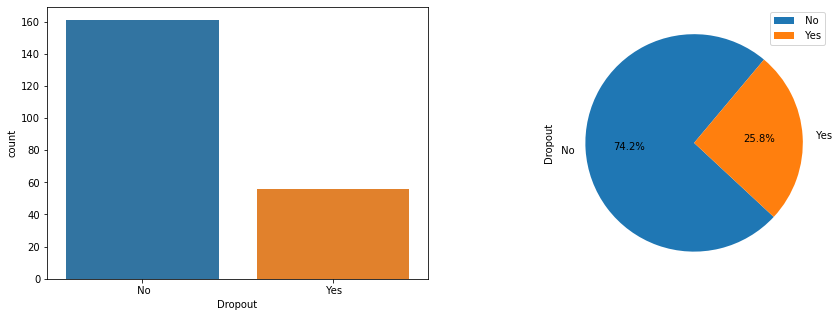

In [11]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(data['Dropout'], ax = axs[0])

pie_Dropout = pd.DataFrame(data['Dropout'].value_counts())
pie_Dropout.plot.pie( subplots=True,labels = pie_Dropout.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

#### Univariate Analysis: Age

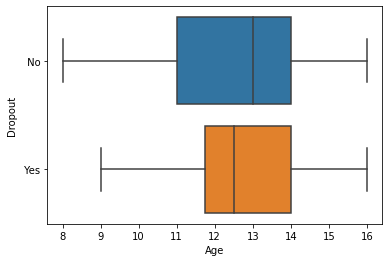

In [12]:
sns.boxplot(x = 'Age', y = 'Dropout', data = data)
plt.show()

#### Univariate Analysis: Gender 

In [13]:
data.Gender.describe()

count        217
unique         2
top       Female
freq         109
Name: Gender, dtype: object

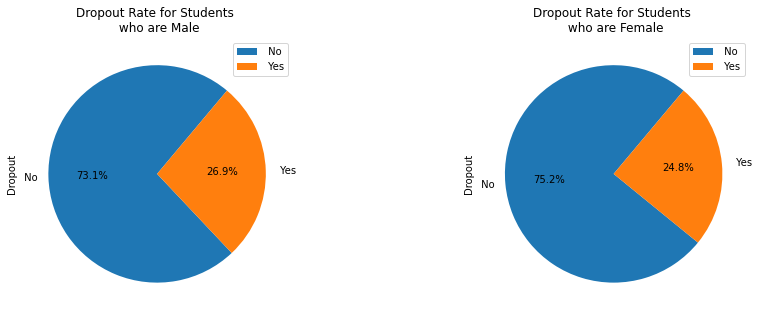

In [14]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

pie_Gender_Male = pd.DataFrame(data[data['Gender'] == "Male"]['Dropout'].value_counts())
pie_Gender_Male.plot.pie(subplots=True, labels = pie_Gender_Male.index.values, autopct='%1.1f%%', startangle= 50,ax = axs[0] )
axs[0].set_title('Dropout Rate for Students \n who are Male')
axs[0].set_aspect('equal')

pie_Gender_Female = pd.DataFrame(data[data['Gender'] == "Female"]['Dropout'].value_counts())
pie_Gender_Female.plot.pie(subplots=True, labels = pie_Gender_Female.index.values, autopct='%1.1f%%', startangle= 50, ax = axs[1])
axs[1].set_title('Dropout Rate for Students \n who are Female')
axs[1].set_aspect('equal')

plt.show() 

#### Univariate Analysis:	Caste 

In [15]:
data.Caste.describe()

count          217
unique           4
top        General
freq           113
Name: Caste, dtype: object

In [16]:
data.Caste.unique()

array([' General', ' OBC', ' ST', ' SC'], dtype=object)

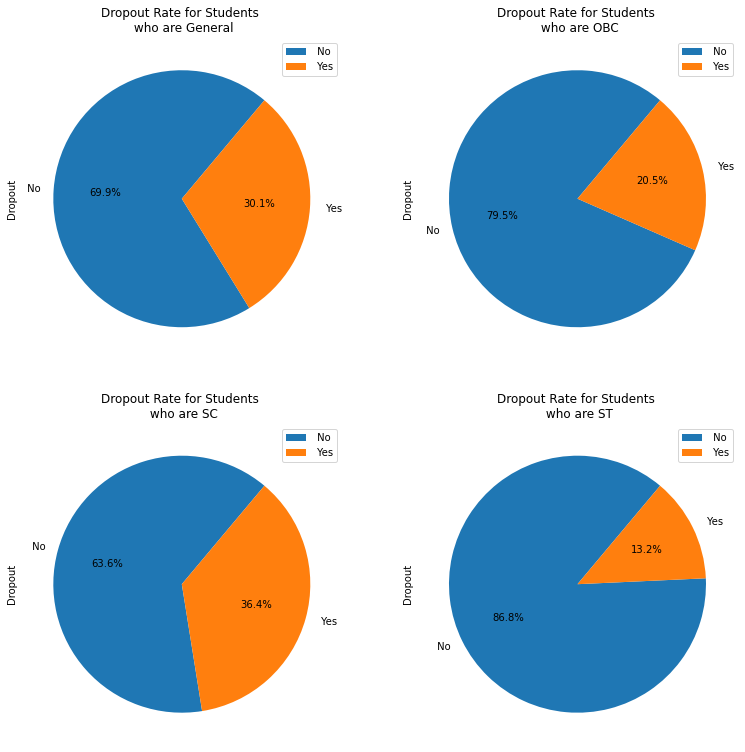

In [17]:
fig, axs = plt.subplots(2,2, figsize = (13,13))

pie_Caste1 = pd.DataFrame(data[data['Caste'] == " General"]['Dropout'].value_counts())
pie_Caste1.plot.pie(subplots=True, labels = pie_Caste1.index.values, autopct='%1.1f%%', startangle= 50,ax = axs[0][0])
axs[0][0].set_title('Dropout Rate for Students \n who are General')
axs[0][0].set_aspect('equal')

pie_Caste2 = pd.DataFrame(data[data['Caste'] == " OBC"]['Dropout'].value_counts())
pie_Caste2.plot.pie(subplots=True, labels = pie_Caste2.index.values, autopct='%1.1f%%', startangle= 50, ax = axs[0][1])
axs[0][1].set_title('Dropout Rate for Students \n who are OBC')
axs[0][1].set_aspect('equal')

pie_Caste3 = pd.DataFrame(data[data['Caste'] == " SC"]['Dropout'].value_counts())
pie_Caste3.plot.pie(subplots=True, labels = pie_Caste3.index.values, autopct='%1.1f%%', startangle= 50,ax = axs[1][0])
axs[1][0].set_title('Dropout Rate for Students \n who are SC')
axs[1][0].set_aspect('equal')

pie_Caste4 = pd.DataFrame(data[data['Caste'] == " ST"]['Dropout'].value_counts())
pie_Caste4.plot.pie(subplots=True, labels = pie_Caste4.index.values, autopct='%1.1f%%', startangle= 50, ax = axs[1][1])
axs[1][1].set_title('Dropout Rate for Students \n who are ST')
axs[1][1].set_aspect('equal')

plt.show() 

#### Univariate Analysis:	School	

In [18]:
data.School.describe()

count            217
unique             4
top        Secondary
freq              76
Name: School, dtype: object

In [19]:
data.School.unique()

array([' Primary', ' Upper Primary', ' Secondary', ' Higher Secondary'],
      dtype=object)

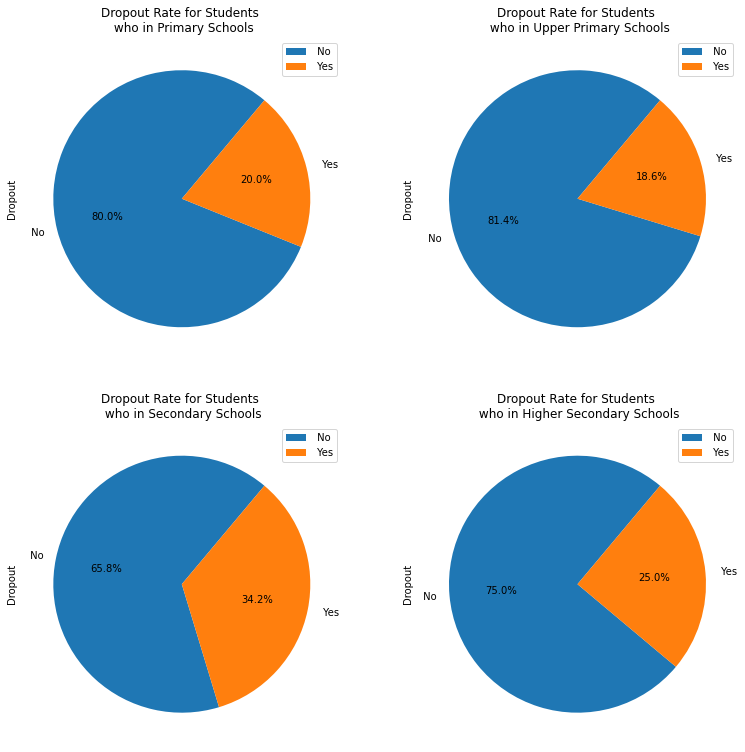

In [20]:
fig, axs = plt.subplots(2,2, figsize = (13,13))

pie_School1 = pd.DataFrame(data[data['School'] == " Primary"]['Dropout'].value_counts())
pie_School1.plot.pie(subplots=True, labels = pie_School1.index.values, autopct='%1.1f%%', startangle= 50,ax = axs[0][0])
axs[0][0].set_title('Dropout Rate for Students \n who in Primary Schools')
axs[0][0].set_aspect('equal')

pie_School2 = pd.DataFrame(data[data['School'] == " Upper Primary"]['Dropout'].value_counts())
pie_School2.plot.pie(subplots=True, labels = pie_School2.index.values, autopct='%1.1f%%', startangle= 50, ax = axs[0][1])
axs[0][1].set_title('Dropout Rate for Students \n who in Upper Primary Schools')
axs[0][1].set_aspect('equal')

pie_School3 = pd.DataFrame(data[data['School'] == " Secondary"]['Dropout'].value_counts())
pie_School3.plot.pie(subplots=True, labels = pie_School3.index.values, autopct='%1.1f%%', startangle= 50,ax = axs[1][0])
axs[1][0].set_title('Dropout Rate for Students \n who in Secondary Schools')
axs[1][0].set_aspect('equal')

pie_School4 = pd.DataFrame(data[data['School'] == " Higher Secondary"]['Dropout'].value_counts())
pie_School4.plot.pie(subplots=True, labels = pie_School4.index.values, autopct='%1.1f%%', startangle= 50, ax = axs[1][1])
axs[1][1].set_title('Dropout Rate for Students \n who in Higher Secondary Schools')
axs[1][1].set_aspect('equal')

plt.show() 

#### Univariate Analysis: Standard 

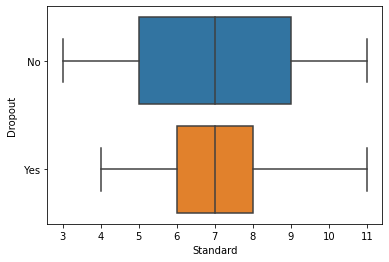

In [21]:
sns.boxplot(x = 'Standard', y = 'Dropout', data = data)
plt.show()

#### Univariate Analysis:	Area 

In [22]:
data.Area.describe()

count         217
unique         36
top        Ladakh
freq           46
Name: Area, dtype: object

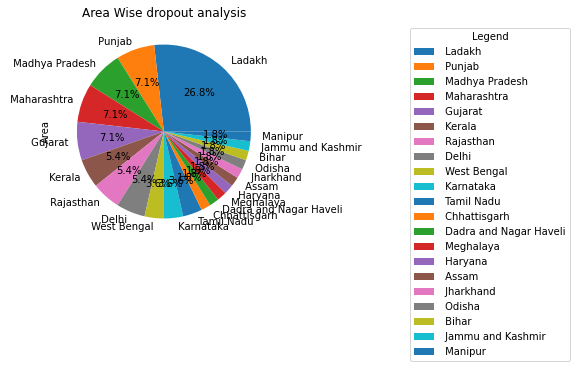

<Figure size 7200x7200 with 0 Axes>

In [23]:
pie_dropout1 = pd.DataFrame(data[data['Dropout'] == " Yes"]['Area'].value_counts())
ax = pie_dropout1.plot.pie(subplots=True, autopct='%1.1f%%', startangle=0, legend=False)
plt.title('Area Wise dropout analysis')
plt.legend(pie_dropout1.index.values, title="Legend", loc="upper center", bbox_to_anchor=(2,1))
plt.figure(figsize=(100, 100))
plt.show()

#### Univariate Analysis: Age

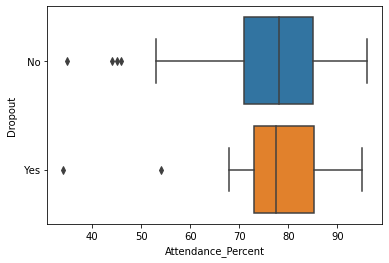

In [24]:
sns.boxplot(x = 'Attendance_Percent', y = 'Dropout', data = data)
plt.show()

In [25]:
data["Gender"] = data["Gender"].replace({"Male": 1, "Female": 0})
data["Caste"] = data["Caste"].replace({" General": 0, " OBC": 1, " ST": 2, " SC": 3})
data["School"] = data["School"].replace({" Primary": 0, " Upper Primary": 1, " Secondary": 2, " Higher Secondary": 3})

In [26]:
data.head()

,Age,Gender,Caste,School,Standard,Area,Dropout,Attendance_Percent
0,12,1,0,0,5,Delhi,No,73
1,14,0,1,1,8,Maharashtra,Yes,92
2,11,1,2,2,7,Uttar Pradesh,No,78
3,13,0,3,3,10,Tamil Nadu,Yes,95
4,15,1,0,2,9,Kerala,No,89


In [27]:
Areas=data["Area"].unique()

In [28]:
area_list = list(range(0, 36))

In [29]:
area_mapping = dict(zip(Areas, area_list))
data['Area'] = data['Area'].replace(area_mapping)

In [30]:
data.head()

,Age,Gender,Caste,School,Standard,Area,Dropout,Attendance_Percent
0,12,1,0,0,5,0,No,73
1,14,0,1,1,8,1,Yes,92
2,11,1,2,2,7,2,No,78
3,13,0,3,3,10,3,Yes,95
4,15,1,0,2,9,4,No,89


In [31]:
target = data['Dropout']
data = data.drop('Dropout', axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [33]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.00%


In [36]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.76      0.97      0.85        33
         Yes       0.50      0.09      0.15        11

    accuracy                           0.75        44
   macro avg       0.63      0.53      0.50        44
weighted avg       0.70      0.75      0.68        44

Confusion Matrix:
[[32  1]
 [10  1]]


In [37]:
new_data = pd.DataFrame({
    'Age': [13],
    'Standard': [9],
    'Gender': [' Male'],
    'Caste': [' ST'],
    'School': [' Upper Primary'],
    'Area': [' Bihar'],
    'Attendance_Percent': [54]
})

In [38]:
new_data["Gender"] = new_data["Gender"].replace({" Male": 1, " Female": 0})
new_data["Caste"] = new_data["Caste"].replace({" General": 0, " OBC": 1, " ST": 2, " SC": 3})
new_data["School"] = new_data["School"].replace({" Primary": 0, " Upper Primary": 1, " Secondary": 2, " Higher Secondary": 3})

In [39]:
new_data['Area'] = new_data['Area'].replace(area_mapping)

In [40]:
new_data

,Age,Standard,Gender,Caste,School,Area,Attendance_Percent
0,13,9,1,2,1,11,54


In [41]:
dropout_probability = model.predict_proba(new_data)[:, 1]
print(f"Dropout Probability: {dropout_probability[0] * 100:.2f}%")

Dropout Probability: 20.20%


In [42]:
new_data2 = pd.DataFrame({
    'Age': [13],
    'Standard': [9],
    'Gender': [' Female'],
    'Caste': [' SC'],
    'School': [' Secondary'],
    'Area': [' Ladakh'],
    'Attendance_Percent': [54]
})

In [43]:
new_data2["Gender"] = new_data2["Gender"].replace({" Male": 1, " Female": 0})
new_data2["Caste"] = new_data2["Caste"].replace({" General": 0, " OBC": 1, " ST": 2, " SC": 3})
new_data2["School"] = new_data2["School"].replace({" Primary": 0, " Upper Primary": 1, " Secondary": 2, " Higher Secondary": 3})
new_data2['Area'] = new_data2['Area'].replace(area_mapping)

In [44]:
dropout_probability = model.predict_proba(new_data2)[:, 1]
print(f"Dropout Probability: {dropout_probability[0] * 100:.2f}%")

Dropout Probability: 36.00%
